## Credit Card Fraud Detection

In this project you will predict fraudulent credit card transactions with the help of Machine learning models. Please import the following libraries to get started.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import metrics
from sklearn import preprocessing

In [2]:
# Import other libraries required for processing and modelling
import warnings
warnings.filterwarnings("ignore")

# Import other libraries
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix, roc_auc_score, roc_curve, precision_score
from matplotlib import pyplot
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Import librries to reat model imbalance
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN

In [3]:
# Checking time
import time
start = time.time()

## Exploratory data analysis

In [4]:
# Review Dataset
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
# Observe the different feature type present in the data
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Here we will observe the distribution of our classes

In [6]:
classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100

print("Percentatge of non-fradulent transaction:",normal_share)
print("Percentatge of fradulent transaction:",fraud_share)

Percentatge of non-fradulent transaction: 99.82725143693798
Percentatge of fradulent transaction: 0.1727485630620034


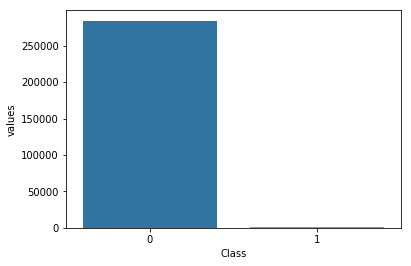

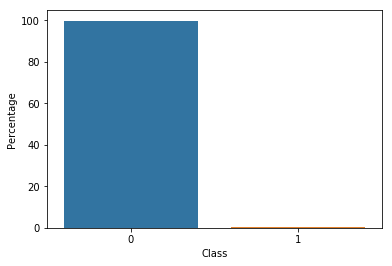

In [7]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations
df1 = pd.DataFrame({'Class': classes.index,'values': classes.values})
sns.barplot(x="Class",y="values",data=df1)
plt.show()
df2 = pd.DataFrame([[0, normal_share], [1, fraud_share]], columns = ['Class','Percentage'])
sns.barplot(x="Class",y="Percentage",data=df2)
plt.show()

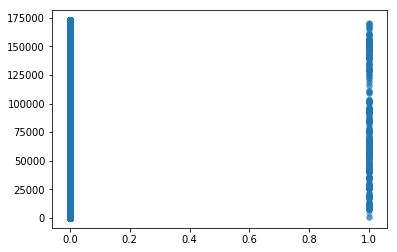

In [8]:
# Create a scatter plot to observe the distribution of classes with time
plt.scatter(df['Class'],df['Time'], alpha=0.5, linewidth=0.15)
plt.show()

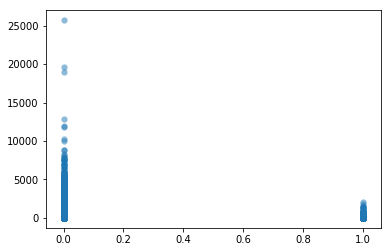

In [9]:
# Create a scatter plot to observe the distribution of classes with Amount
plt.scatter(df['Class'],df['Amount'], alpha=0.5, linewidth=0.15)
plt.show()

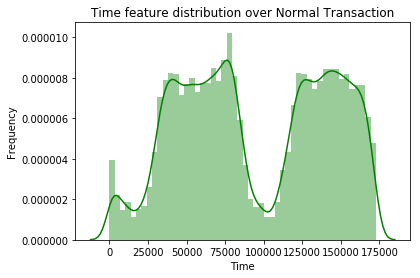

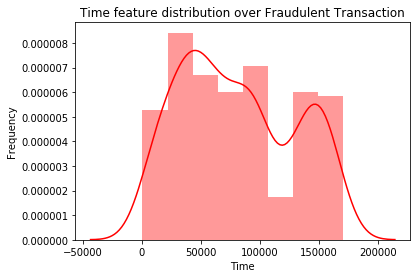

In [10]:
# Distribution of class vs time
fraud = df[df.Class == 1]
normal = df[df.Class == 0]

sns.distplot(normal["Time"], color='g')
plt.title("Time feature distribution over Normal Transaction")
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.show()
sns.distplot(fraud["Time"], color='r')
plt.title("Time feature distribution over Fraudulent Transaction")
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.show()

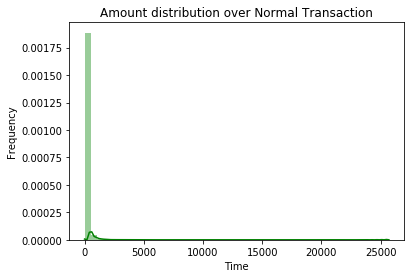

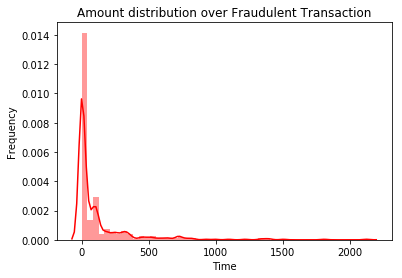

In [11]:
# Distribution of Amount vs time
fraud = df[df.Class == 1]
normal = df[df.Class == 0]


sns.distplot(normal["Amount"], color='g')
plt.title("Amount distribution over Normal Transaction")
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.show()
sns.distplot(fraud["Amount"], color='r')
plt.title("Amount distribution over Fraudulent Transaction")
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.show()


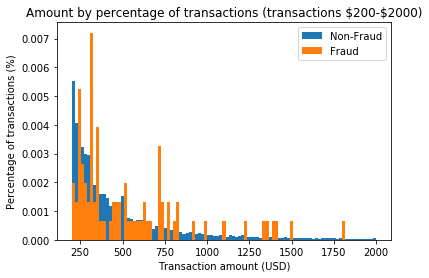

In [12]:
# Plot of high value transactions($200-$2000)
bins = np.linspace(200, 2000, 100)
plt.hist(normal["Amount"], bins, alpha=1, density=True, label='Non-Fraud')
plt.hist(fraud["Amount"], bins, alpha=1, density=True, label='Fraud')
plt.legend(loc='upper right')
plt.title("Amount by percentage of transactions (transactions \$200-$2000)")
plt.xlabel("Transaction amount (USD)")
plt.ylabel("Percentage of transactions (%)")
plt.show()

### Splitting the data into train & test data

In [13]:
# Splitting data into X and y
y = df["Class"] #class variable
X = df.drop("Class",axis=1)

In [14]:
# Splitting into Train and Test
from sklearn import model_selection

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.25, random_state = 100)

##### Preserve X_test & y_test to evaluate on the test data once you build the model

In [15]:
# Check shape of train and test
X_train.shape, X_test.shape

((213605, 30), (71202, 30))

In [16]:
# Check distribution of target variable
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

492
370
122


### Plotting the distribution of a variable

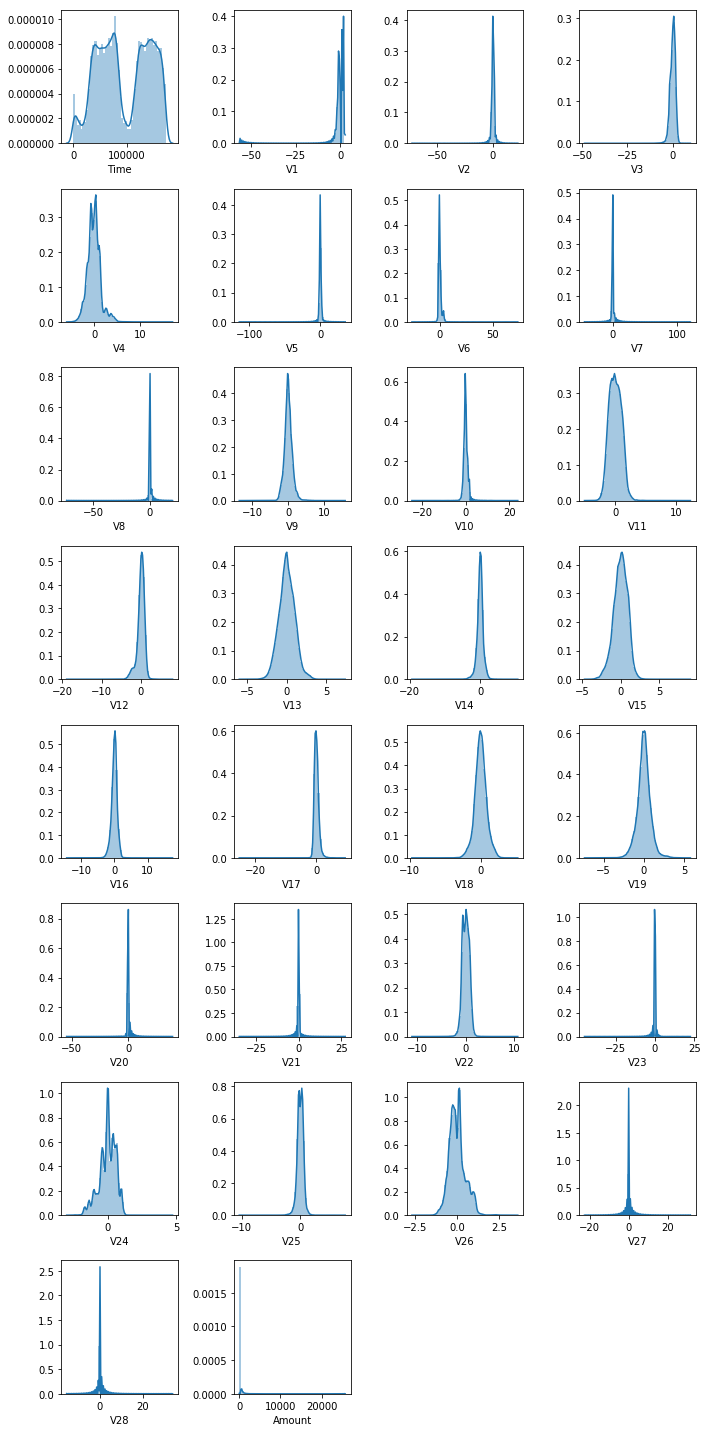

In [17]:
# plot the histogram of a variable from the dataset to see the skewness
numcols=list(X.select_dtypes(exclude='object'))

# Number of numerical columns
ln=len(numcols)

# calculation for subplots
n=4
m=(ln//n)+1
ct=1

# Setting figure siz
plt.figure(1,figsize=(10,20))

# Running in loop to plot all columns as subplot
for column in numcols:
    plt.subplot(m,n,ct)

    data = df[column]
    sns.distplot(data.dropna(),hist=True)
    ct+=1

# Show graphs
plt.tight_layout()
plt.show()

### If there is skewness present in the distribution use:
- <b>Power Transformer</b> package present in the <b>preprocessing library provided by sklearn</b> to make distribution more gaussian

In [18]:
# - Apply : preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data
# from sklearn import preprocessing

# Create a copy of X so that actual data is not lost

X_train_trans = X_train.copy()
X_test_trans =  X_test.copy()

from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(copy=False)
X_train_trans = pt.fit_transform(X_train_trans)
X_test_trans = pt.transform(X_test_trans)

In [19]:
# Check shape of train and test
X_train_trans.shape,X_test_trans.shape

((213605, 30), (71202, 30))

In [20]:
# Put in dataframe
df_train = pd.DataFrame(X_train_trans,columns=numcols)
df_test = pd.DataFrame(X_test_trans,columns=numcols)
trans_X = pd.concat([df_train,df_test])
trans_X.shape

(284807, 30)

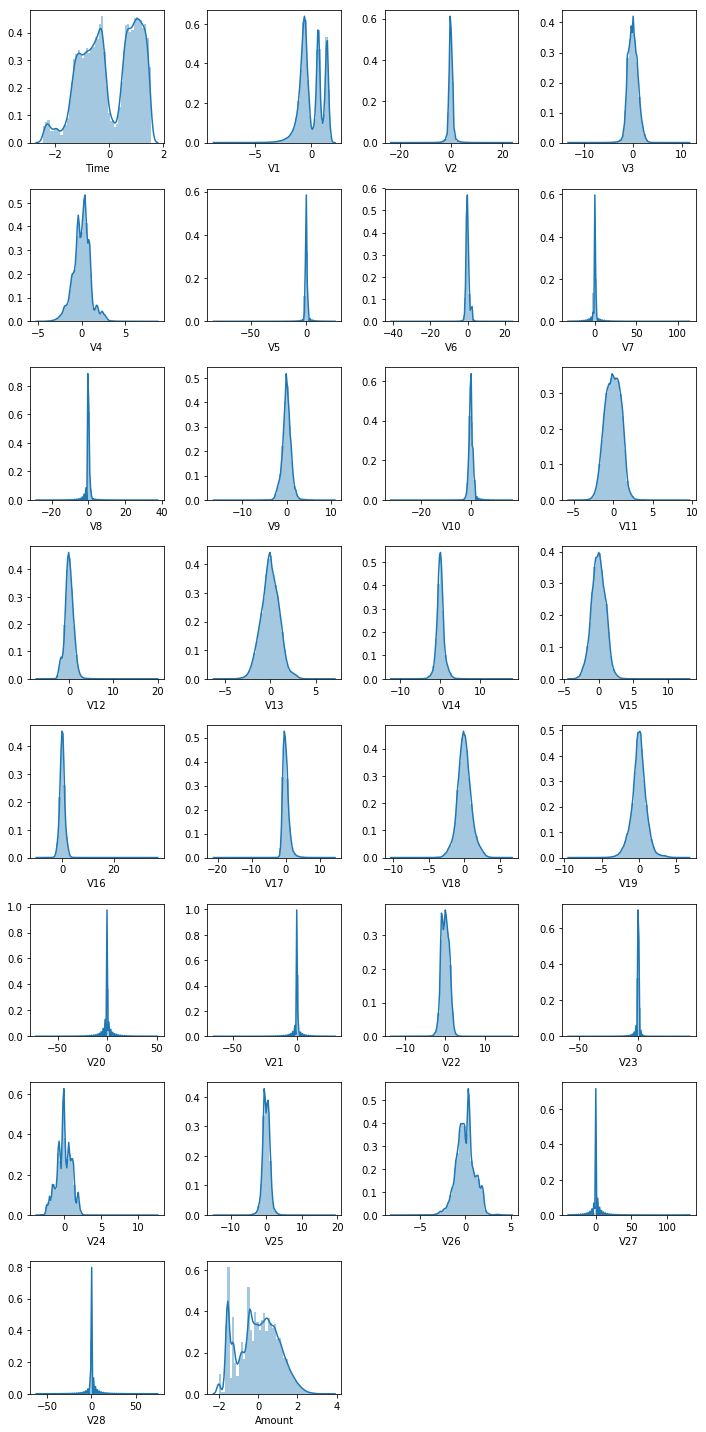

In [21]:
# plot the histogram of a variable from the dataset again to see the result 
numcols=list(trans_X.select_dtypes(exclude='object'))

# Number of numerical columns
ln=len(numcols)

# calculation for subplots
n=4
m=(ln//n)+1
ct=1

# Setting figure siz
plt.figure(1,figsize=(10,20))

# Running in loop to plot all columns as subplot
for column in numcols:
    plt.subplot(m,n,ct)

    data = trans_X[column]
    sns.distplot(data.dropna(),hist=True)
    ct+=1

# Show graphs
plt.tight_layout()
plt.show()

## Model Building
- Build different models on the imbalanced dataset and see the result

In [22]:
# Logistic Regression
from sklearn import linear_model #import the package

# num_C = ______  #--> list of values
# cv_num =   #--> list of values

### Bechmark Logistic Regression Model

#### Copy transformed X data (removed skewness)

In [23]:
# Save copy of Train and Test
X_train = X_train_trans
X_test = X_test_trans

In [24]:
# Import Libraries
logreg = LogisticRegression(max_iter=500)

# Build model
lrm = logreg.fit(X_train,y_train)

# Predict using model
y_pred_prob = lrm.predict_proba(X_test)


# Check ROC score
"{:2.2}".format(metrics.roc_auc_score(y_test, y_pred_prob[:,1]))

'0.97'

### Let's check all classifiers


In [25]:
# Use GridSearchCV to find the best parameters.
from sklearn.model_selection import GridSearchCV

# Logistic Regression 
log_reg_params = {"penalty": ['l2'], 'C': [0.001, 0.1, 1, 10, 100]}
grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params,scoring='roc_auc',verbose=2)
grid_log_reg.fit(X_train, y_train)
# LogisticRegression Get best parameter
log_reg = grid_log_reg.best_estimator_

## We will not tain SVC since it is computationally expensive

# DecisionTree Classifier
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,6,2)), 
              "min_samples_leaf": list(range(5,10,2))}
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params,scoring='roc_auc',verbose=2)
grid_tree.fit(X_train, y_train)

# DecisionTree Get best parameter
tree_clf = grid_tree.best_estimator_


# XGBOOST Classifier
xgb_params = {'learning_rate': [0.6, 0.8], 'subsample': [0.6, 0.9]} 
xgb = GridSearchCV(XGBClassifier(max_depth=2, n_estimators=200), xgb_params,scoring='roc_auc',verbose=2)
xgb.fit(X_train, y_train)

# XGB Get best parameter
xgb_clf = xgb.best_estimator_

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] C=0.001, penalty=l2 .............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .............................. C=0.001, penalty=l2, total=   0.6s
[CV] C=0.001, penalty=l2 .............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


[CV] .............................. C=0.001, penalty=l2, total=   0.6s
[CV] C=0.001, penalty=l2 .............................................
[CV] .............................. C=0.001, penalty=l2, total=   0.6s
[CV] C=0.001, penalty=l2 .............................................
[CV] .............................. C=0.001, penalty=l2, total=   0.5s
[CV] C=0.001, penalty=l2 .............................................
[CV] .............................. C=0.001, penalty=l2, total=   0.6s
[CV] C=0.1, penalty=l2 ...............................................
[CV] ................................ C=0.1, penalty=l2, total=   1.2s
[CV] C=0.1, penalty=l2 ...............................................
[CV] ................................ C=0.1, penalty=l2, total=   1.2s
[CV] C=0.1, penalty=l2 ...............................................
[CV] ................................ C=0.1, penalty=l2, total=   1.2s
[CV] C=0.1, penalty=l2 ...............................................
[CV] .

[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:   28.5s finished


Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] criterion=gini, max_depth=2, min_samples_leaf=5 .................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .. criterion=gini, max_depth=2, min_samples_leaf=5, total=   1.8s
[CV] criterion=gini, max_depth=2, min_samples_leaf=5 .................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.8s remaining:    0.0s


[CV] .. criterion=gini, max_depth=2, min_samples_leaf=5, total=   1.8s
[CV] criterion=gini, max_depth=2, min_samples_leaf=5 .................
[CV] .. criterion=gini, max_depth=2, min_samples_leaf=5, total=   1.8s
[CV] criterion=gini, max_depth=2, min_samples_leaf=5 .................
[CV] .. criterion=gini, max_depth=2, min_samples_leaf=5, total=   1.8s
[CV] criterion=gini, max_depth=2, min_samples_leaf=5 .................
[CV] .. criterion=gini, max_depth=2, min_samples_leaf=5, total=   1.8s
[CV] criterion=gini, max_depth=2, min_samples_leaf=7 .................
[CV] .. criterion=gini, max_depth=2, min_samples_leaf=7, total=   1.8s
[CV] criterion=gini, max_depth=2, min_samples_leaf=7 .................
[CV] .. criterion=gini, max_depth=2, min_samples_leaf=7, total=   1.8s
[CV] criterion=gini, max_depth=2, min_samples_leaf=7 .................
[CV] .. criterion=gini, max_depth=2, min_samples_leaf=7, total=   1.8s
[CV] criterion=gini, max_depth=2, min_samples_leaf=7 .................
[CV] .

[CV]  criterion=entropy, max_depth=4, min_samples_leaf=9, total=   5.1s


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:  3.3min finished


Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] learning_rate=0.6, subsample=0.6 ................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................. learning_rate=0.6, subsample=0.6, total=  23.7s
[CV] learning_rate=0.6, subsample=0.6 ................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   23.7s remaining:    0.0s


[CV] ................. learning_rate=0.6, subsample=0.6, total=  23.0s
[CV] learning_rate=0.6, subsample=0.6 ................................
[CV] ................. learning_rate=0.6, subsample=0.6, total=  23.0s
[CV] learning_rate=0.6, subsample=0.6 ................................
[CV] ................. learning_rate=0.6, subsample=0.6, total=  23.3s
[CV] learning_rate=0.6, subsample=0.6 ................................
[CV] ................. learning_rate=0.6, subsample=0.6, total=  23.2s
[CV] learning_rate=0.6, subsample=0.9 ................................
[CV] ................. learning_rate=0.6, subsample=0.9, total=  26.1s
[CV] learning_rate=0.6, subsample=0.9 ................................
[CV] ................. learning_rate=0.6, subsample=0.9, total=  26.3s
[CV] learning_rate=0.6, subsample=0.9 ................................
[CV] ................. learning_rate=0.6, subsample=0.9, total=  26.0s
[CV] learning_rate=0.6, subsample=0.9 ................................
[CV] .

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  8.1min finished


In [26]:
# Best Score
print("*"*100)
print("Logistic Regression")
print("Best score: ",grid_log_reg.best_score_)
print("Parameters: ",grid_log_reg.best_params_)
print("="*100)
print("Decision Tree")
print("Best score: ",grid_tree.best_score_)
print("Parameters: ",grid_tree.best_params_)
print("*"*100)
print("XGB")
print("Best score: ",xgb.best_score_)
print("Parameters: ",xgb.best_params_)
print("*"*100)

****************************************************************************************************
Logistic Regression
Best score:  0.982270353923694
Parameters:  {'C': 0.1, 'penalty': 'l2'}
Decision Tree
Best score:  0.9507567149300449
Parameters:  {'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 9}
****************************************************************************************************
XGB
Best score:  0.9785488856033092
Parameters:  {'learning_rate': 0.8, 'subsample': 0.9}
****************************************************************************************************


#### Proceed with the model which shows the best result 
- Apply the best hyperparameter on the model
- Predict on the test dataset

### Create a function for all scores

In [27]:
# Create a temporary dataframe to store scores
model_score = pd.DataFrame(columns=["Model","Accuracy","Recall","Precision","AUC"])
model_score

,Model,Accuracy,Recall,Precision,AUC


In [28]:
def calscore(predict,mdl,df_score):
    lr_predict = predict
    lr_accuracy = accuracy_score(y_test, lr_predict)
    lr_recall = recall_score(y_test, lr_predict)
    lr_precision = precision_score(y_test, lr_predict)
    lr_cm = confusion_matrix(y_test, lr_predict)
    lr_auc = roc_auc_score(y_test, lr_predict)

    print("Accuracy: {:.4%}".format(lr_accuracy))
    print("Recall: {:.4%}".format(lr_recall))
    print("Precision: {:.4%}".format(lr_precision))
    print("ROC AUC: {:.4%}".format(lr_auc))

    lr_cm = pd.DataFrame(lr_cm, ['True Normal','True Fraud'],['Prediction Normal','Prediction Fraud'])
    pyplot.figure(figsize = (8,4))
    sns.set(font_scale=1.4)
    sns.heatmap(lr_cm, annot=True,annot_kws={"size": 16},fmt='g')
    
    # Store values
    df_score = df_score.append([{"Model":mdl,
                    "Accuracy":round(lr_accuracy,4),
                    "Recall":round(lr_recall,4),
                    "Precision":round(lr_precision,4),
                    "AUC":round(lr_auc,4)
                    }])
    return(df_score)
    
# Define a roc_curve function
def plot_roc_curve(false_positive_rate,true_positive_rate,roc_auc):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label='AUC = %0.3f'% roc_auc)
    plt.plot([0,1],[0,1], linewidth=2)
    plt.xlim([-0.01, 1])
    plt.ylim([0, 1.01])
    plt.legend(loc='lower right')
    plt.title('Receiver operating characteristic curve (ROC)')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

### Logistic Regression with L2 regularization  

In [29]:
clf = LogisticRegression(C= 0.1, penalty = 'l2',random_state=40)  #initialise the model with optimum hyperparameters
clf.fit(X_train, y_train)

#print the evaluation score on the X_test by choosing the best evaluation metric
# Predict using model
y_pred_prob = clf.predict_proba(X_test)
lr_predict = clf.predict(X_test)

# Check ROC score
print("{:2.2}".format(metrics.roc_auc_score(y_test, y_pred_prob[:,1])))

0.97


Accuracy: 99.9101%
Recall: 63.9344%
Precision: 79.5918%
ROC AUC: 81.9531%


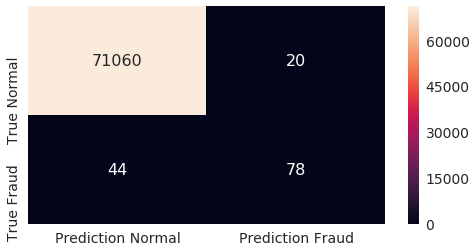

In [30]:
# Calculate performance for model
model_score = calscore(lr_predict,"Logreg-Unbalanced",model_score)

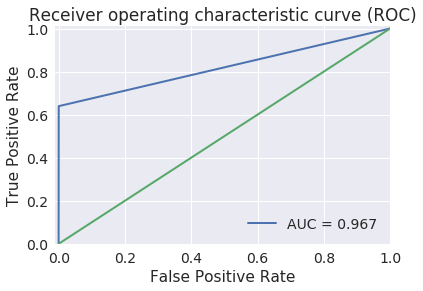

In [31]:
# Plot the roc curve 
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, lr_predict)
roc_auc = roc_auc_score(y_test, y_pred_prob[:,1])
plot_roc_curve(false_positive_rate,true_positive_rate,roc_auc)

### Deision Tree with Parameters:  {'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 5}

In [32]:
clf = DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=5)  #initialise the model with optimum hyperparameters
clf.fit(X_train, y_train)

#print the evaluation score on the X_test by choosing the best evaluation metric
# Predict using model
y_pred_prob = clf.predict_proba(X_test)
dt_predict = clf.predict(X_test)

# Check ROC score
print("{:2.2}".format(metrics.roc_auc_score(y_test, y_pred_prob[:,1])))

0.92


Accuracy: 99.9087%
Recall: 71.3115%
Precision: 74.3590%
ROC AUC: 85.6346%


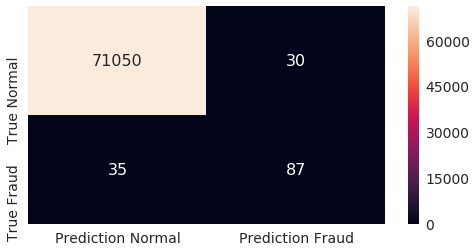

In [33]:
# Calculate performance for model
model_score = calscore(dt_predict,"DecisionTree-Unbalanced",model_score)

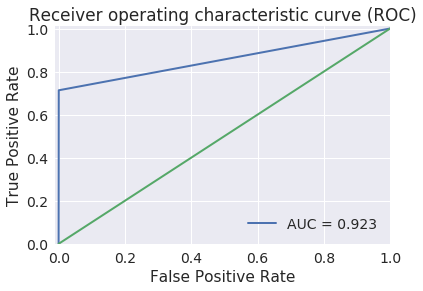

In [34]:
# Plot the roc curve 
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, dt_predict)
roc_auc = roc_auc_score(y_test, y_pred_prob[:,1])
plot_roc_curve(false_positive_rate,true_positive_rate,roc_auc)

### XGBoost with Parameters:  {'learning_rate': 0.8, 'subsample': 0.9}

In [35]:
clf = XGBClassifier(learning_rate=0.8, subsample=0.9, max_depth=2, n_estimators=200)  #initialise the model with optimum hyperparameters
clf.fit(X_train, y_train)

#print the evaluation score on the X_test by choosing the best evaluation metric
# Predict using model
y_pred_prob = clf.predict_proba(X_test)
xgb_predict = clf.predict(X_test)

# Check ROC score
print("{:2.2}".format(metrics.roc_auc_score(y_test, y_pred_prob[:,1])))

0.98


Accuracy: 99.9396%
Recall: 72.9508%
Precision: 89.8990%
ROC AUC: 86.4684%


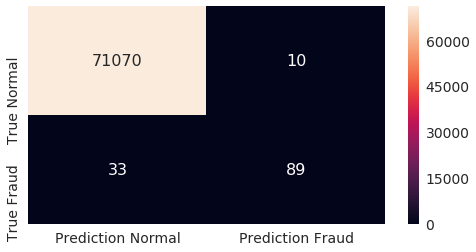

In [36]:
# Calculate performance for model
model_score = calscore(xgb_predict,"XGB-Unbalanced",model_score)

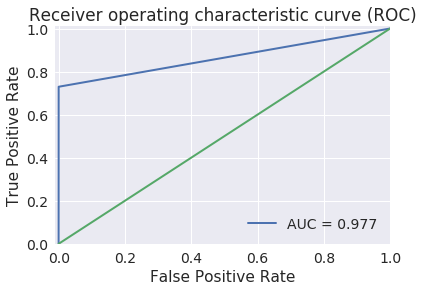

In [37]:
# Plot the roc curve 
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, xgb_predict)
roc_auc = roc_auc_score(y_test, y_pred_prob[:,1])
plot_roc_curve(false_positive_rate,true_positive_rate,roc_auc)

In [38]:
model_score

,Model,Accuracy,Recall,Precision,AUC
0,Logreg-Unbalanced,0.9991,0.6393,0.7959,0.8195
0,DecisionTree-Unbalanced,0.9991,0.7131,0.7436,0.8563
0,XGB-Unbalanced,0.9994,0.7295,0.8990,0.8647


### Print the important features of the best model to understand the dataset
- This will not give much explanation on the already transformed dataset
- But it will help us in understanding if the dataset is not PCA transformed

Top var = 18
2nd Top var = 15
3rd Top var = 11


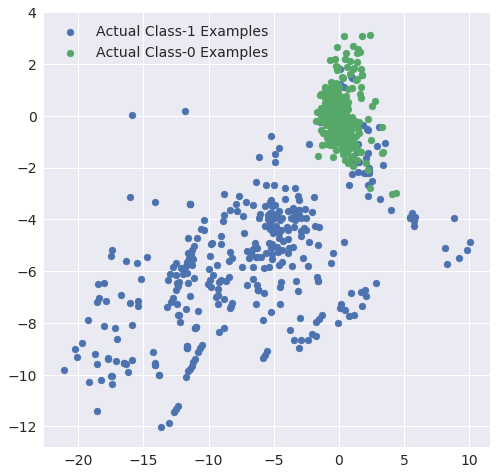

In [39]:
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-16 and Index-13 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

# X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
# X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

X_train_1 = X_train[np.where(y_train==1.0)]
X_train_0 = X_train[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [8, 8]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

## Model building with balancing Classes

##### Perform class balancing with :
- Random Oversampling
- SMOTE
- ADASYN

## Model Building
- Build different models on the balanced dataset and see the result

In [40]:
# Logistic Regression
from sklearn import linear_model #import the package

# num_C = ______  #--> list of values
# cv_num =   #--> list of values

### Random Oversampling

#### Treat class imbalance using Random Oversampling

In [41]:
# Treat Imbalance
ro = RandomOverSampler(random_state=40)
X_oversam, y_oversam = ro.fit_sample(X_train,y_train)

In [42]:
# Let's check data after balancing
y_oversam.value_counts() 

1    213235
0    213235
Name: Class, dtype: int64

### Logistic Regression on Balanced Data

In [43]:
from imblearn import over_sampling #- import the packages

#perform cross validation & then balance classes on X_train_cv & y_train_cv using Random Oversampling
#perform hyperparameter tuning
# Logistic Regression 
log_reg_params = {"penalty": ['l2'], 'C': [0.001, 0.1, 1, 10, 100]}
skf = StratifiedKFold(n_splits=3, random_state=40, shuffle=False)
grid_log_reg = RandomizedSearchCV(LogisticRegression(), log_reg_params,scoring='roc_auc',verbose=2,cv=skf)
grid_log_reg.fit(X_oversam, y_oversam)

#print the evaluation result by choosing a evaluation metric
print(grid_log_reg.cv_results_)

#print the optimum value of hyperparameters
print("*"*100)
print("Logreg")
print("Best score: ",grid_log_reg.best_score_)
print("Parameters: ",grid_log_reg.best_params_)
print("*"*100)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] penalty=l2, C=0.001 .............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .............................. penalty=l2, C=0.001, total=   1.4s
[CV] penalty=l2, C=0.001 .............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.4s remaining:    0.0s


[CV] .............................. penalty=l2, C=0.001, total=   1.3s
[CV] penalty=l2, C=0.001 .............................................
[CV] .............................. penalty=l2, C=0.001, total=   1.4s
[CV] penalty=l2, C=0.1 ...............................................
[CV] ................................ penalty=l2, C=0.1, total=   2.0s
[CV] penalty=l2, C=0.1 ...............................................
[CV] ................................ penalty=l2, C=0.1, total=   1.9s
[CV] penalty=l2, C=0.1 ...............................................
[CV] ................................ penalty=l2, C=0.1, total=   1.8s
[CV] penalty=l2, C=1 .................................................
[CV] .................................. penalty=l2, C=1, total=   2.1s
[CV] penalty=l2, C=1 .................................................
[CV] .................................. penalty=l2, C=1, total=   2.0s
[CV] penalty=l2, C=1 .................................................
[CV] .

[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:   27.4s finished


{'mean_fit_time': array([1.31400522, 1.84105976, 1.90969507, 1.88293036, 1.87809666]), 'std_fit_time': array([0.04657286, 0.08430816, 0.09247885, 0.11319339, 0.11811653]), 'mean_score_time': array([0.05593061, 0.05636326, 0.05618604, 0.05650528, 0.05606016]), 'std_score_time': array([0.00042994, 0.00071484, 0.00089802, 0.00077673, 0.00033215]), 'param_penalty': masked_array(data=['l2', 'l2', 'l2', 'l2', 'l2'],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_C': masked_array(data=[0.001, 0.1, 1, 10, 100],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'penalty': 'l2', 'C': 0.001}, {'penalty': 'l2', 'C': 0.1}, {'penalty': 'l2', 'C': 1}, {'penalty': 'l2', 'C': 10}, {'penalty': 'l2', 'C': 100}], 'split0_test_score': array([0.98943703, 0.98969721, 0.98969792, 0.98969717, 0.98969718]), 'split1_test_score': array([0.98968451, 0.98990939, 0.98990867, 0.98990879,

### Logistic Regression with Random Oversampling Parameters:  {'penalty': 'l2', 'C': 0.1}

In [44]:
clf = LogisticRegression(C= 0.1, penalty = 'l2',random_state=40)  #initialise the model with optimum hyperparameters
clf.fit(X_oversam, y_oversam)

#print the evaluation score on the X_test by choosing the best evaluation metric
# Predict using model
y_pred_prob = clf.predict_proba(X_test)
lr_predict = clf.predict(X_test)

# Check ROC score
print("{:2.2}".format(metrics.roc_auc_score(y_test, y_pred_prob[:,1])))

0.97


Accuracy: 97.5717%
Recall: 88.5246%
Precision: 5.9243%
ROC AUC: 93.0559%


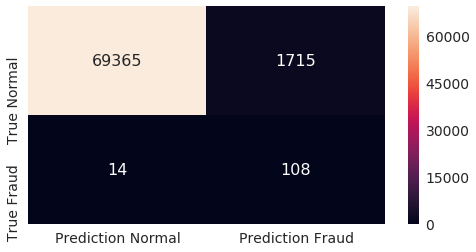

In [45]:
# Calculate performance for model
model_score = calscore(lr_predict,"Logreg-RandomOverSampling",model_score)

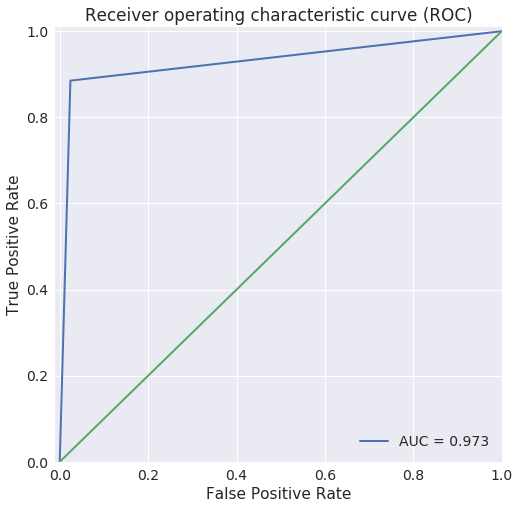

In [46]:
# Plot the roc curve 
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, lr_predict)
roc_auc = roc_auc_score(y_test, y_pred_prob[:,1])
plot_roc_curve(false_positive_rate,true_positive_rate,roc_auc)

### XGB Regression on Balanced Data

In [47]:
from imblearn import over_sampling #- import the packages

#perform cross validation & then balance classes on X_train_cv & y_train_cv using Random Oversampling
#perform hyperparameter tuning
xgb_params = {'learning_rate': [0.6, 0.8], 'subsample': [0.6, 0.9]}
skf = StratifiedKFold(n_splits=3, random_state=40, shuffle=False)
xgb = RandomizedSearchCV(XGBClassifier(max_depth=2, n_estimators=200), xgb_params,scoring='roc_auc',verbose=2,cv=skf)
xgb.fit(X_oversam, y_oversam)

#print the evaluation result by choosing a evaluation metric
print(xgb.cv_results_)

#print the optimum value of hyperparameters
print("*"*100)
print("XGB")
print("Best score: ",xgb.best_score_)
print("Parameters: ",xgb.best_params_)
print("*"*100)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV] subsample=0.6, learning_rate=0.6 ................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................. subsample=0.6, learning_rate=0.6, total=  33.6s
[CV] subsample=0.6, learning_rate=0.6 ................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   33.6s remaining:    0.0s


[CV] ................. subsample=0.6, learning_rate=0.6, total=  33.6s
[CV] subsample=0.6, learning_rate=0.6 ................................
[CV] ................. subsample=0.6, learning_rate=0.6, total=  33.6s
[CV] subsample=0.9, learning_rate=0.6 ................................
[CV] ................. subsample=0.9, learning_rate=0.6, total=  35.3s
[CV] subsample=0.9, learning_rate=0.6 ................................
[CV] ................. subsample=0.9, learning_rate=0.6, total=  35.5s
[CV] subsample=0.9, learning_rate=0.6 ................................
[CV] ................. subsample=0.9, learning_rate=0.6, total=  35.2s
[CV] subsample=0.6, learning_rate=0.8 ................................
[CV] ................. subsample=0.6, learning_rate=0.8, total=  33.6s
[CV] subsample=0.6, learning_rate=0.8 ................................
[CV] ................. subsample=0.6, learning_rate=0.8, total=  33.3s
[CV] subsample=0.6, learning_rate=0.8 ................................
[CV] .

[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:  6.9min finished


{'mean_fit_time': array([33.18880812, 34.96242301, 32.96703418, 34.77411469]), 'std_fit_time': array([0.01632835, 0.14199304, 0.16592253, 0.12724442]), 'mean_score_time': array([0.39824184, 0.39210359, 0.38791529, 0.38748797]), 'std_score_time': array([0.00150454, 0.00126034, 0.00276613, 0.0008693 ]), 'param_subsample': masked_array(data=[0.6, 0.9, 0.6, 0.9],
             mask=[False, False, False, False],
       fill_value='?',
            dtype=object), 'param_learning_rate': masked_array(data=[0.6, 0.6, 0.8, 0.8],
             mask=[False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'subsample': 0.6, 'learning_rate': 0.6}, {'subsample': 0.9, 'learning_rate': 0.6}, {'subsample': 0.6, 'learning_rate': 0.8}, {'subsample': 0.9, 'learning_rate': 0.8}], 'split0_test_score': array([0.99998049, 0.99998333, 0.99998921, 0.99999051]), 'split1_test_score': array([0.99998392, 0.99998795, 0.99998505, 0.99999137]), 'split2_test_score': array([0.99997493, 0.9

### XGBoost with Random Oversampling Parameters:  {'learning_rate': 0.8, 'subsample': 0.9}

In [48]:
clf = XGBClassifier(learning_rate=0.8, subsample=0.9, max_depth=2, n_estimators=200)  #initialise the model with optimum hyperparameters
clf.fit(X_oversam, y_oversam)

#print the evaluation score on the X_test by choosing the best evaluation metric
# Predict using model
y_pred_prob = clf.predict_proba(X_test)
xgb_predict = clf.predict(X_test)

# Check ROC score
print("{:2.2}".format(metrics.roc_auc_score(y_test, y_pred_prob[:,1])))

0.97


Accuracy: 99.9326%
Recall: 78.6885%
Precision: 81.3559%
ROC AUC: 89.3288%


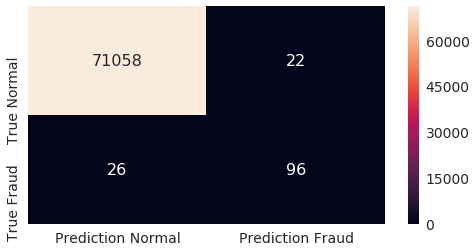

In [49]:
# Calculate performance for model
model_score = calscore(xgb_predict,"XGB-RandomOverSampling",model_score)

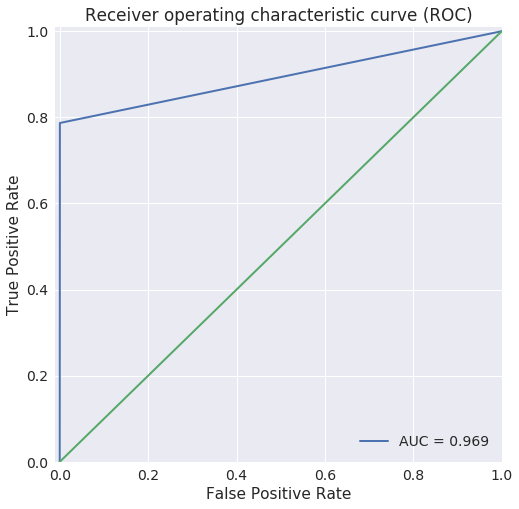

In [50]:
# Plot the roc curve 
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, xgb_predict)
roc_auc = roc_auc_score(y_test, y_pred_prob[:,1])
plot_roc_curve(false_positive_rate,true_positive_rate,roc_auc)

### Decision Tree on Balanced Data

In [51]:
from imblearn import over_sampling #- import the packages

#perform cross validation & then balance classes on X_train_cv & y_train_cv using Random Oversampling
#perform hyperparameter tuning
# DecisionTree Classifier
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,6,2)), 
              "min_samples_leaf": list(range(5,10,2))}
skf = StratifiedKFold(n_splits=3, random_state=40, shuffle=False)
grid_tree = RandomizedSearchCV(DecisionTreeClassifier(), tree_params,scoring='roc_auc',verbose=2,cv=skf)
grid_tree.fit(X_oversam, y_oversam)

#print the evaluation result by choosing a evaluation metric
print(grid_tree.cv_results_)

#print the optimum value of hyperparameters
print("*"*100)
print("Decision Tree")
print("Best score: ",grid_tree.best_score_)
print("Parameters: ",grid_tree.best_params_)
print("*"*100)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] min_samples_leaf=7, max_depth=4, criterion=gini .................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .. min_samples_leaf=7, max_depth=4, criterion=gini, total=   3.5s
[CV] min_samples_leaf=7, max_depth=4, criterion=gini .................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.6s remaining:    0.0s


[CV] .. min_samples_leaf=7, max_depth=4, criterion=gini, total=   3.6s
[CV] min_samples_leaf=7, max_depth=4, criterion=gini .................
[CV] .. min_samples_leaf=7, max_depth=4, criterion=gini, total=   3.6s
[CV] min_samples_leaf=5, max_depth=2, criterion=gini .................
[CV] .. min_samples_leaf=5, max_depth=2, criterion=gini, total=   2.0s
[CV] min_samples_leaf=5, max_depth=2, criterion=gini .................
[CV] .. min_samples_leaf=5, max_depth=2, criterion=gini, total=   1.9s
[CV] min_samples_leaf=5, max_depth=2, criterion=gini .................
[CV] .. min_samples_leaf=5, max_depth=2, criterion=gini, total=   1.9s
[CV] min_samples_leaf=9, max_depth=2, criterion=entropy ..............
[CV]  min_samples_leaf=9, max_depth=2, criterion=entropy, total=   2.8s
[CV] min_samples_leaf=9, max_depth=2, criterion=entropy ..............
[CV]  min_samples_leaf=9, max_depth=2, criterion=entropy, total=   2.8s
[CV] min_samples_leaf=9, max_depth=2, criterion=entropy ..............
[CV]

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:  1.6min finished


{'mean_fit_time': array([3.54075789, 1.89769475, 2.75574835, 1.90388823, 2.73987873,
       1.90058303, 3.5274961 , 5.15982143, 5.1171817 , 3.49717315]), 'std_fit_time': array([0.02621159, 0.01052225, 0.00654992, 0.01785109, 0.01258908,
       0.00620623, 0.00766532, 0.00761803, 0.02104033, 0.01493834]), 'mean_score_time': array([0.04016503, 0.03856039, 0.03881343, 0.03968279, 0.03884625,
       0.03872045, 0.04057431, 0.04064345, 0.04109518, 0.03992677]), 'std_score_time': array([0.00069268, 0.00022674, 0.00061394, 0.00036217, 0.00059799,
       0.00032138, 0.00047016, 0.00043614, 0.00034858, 0.00036931]), 'param_min_samples_leaf': masked_array(data=[7, 5, 9, 9, 7, 7, 9, 5, 9, 5],
             mask=[False, False, False, False, False, False, False, False,
                   False, False],
       fill_value='?',
            dtype=object), 'param_max_depth': masked_array(data=[4, 2, 2, 2, 2, 2, 4, 4, 4, 4],
             mask=[False, False, False, False, False, False, False, False,
      

### Decision Tree with Random Oversampling Parameters:  {'min_samples_leaf': 9, 'max_depth': 4, 'criterion': 'entropy'}

In [52]:
clf = DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=9)  #initialise the model with optimum hyperparameters
clf.fit(X_oversam, y_oversam)

#print the evaluation score on the X_test by choosing the best evaluation metric
# Predict using model
y_pred_prob = clf.predict_proba(X_test)
dt_predict = clf.predict(X_test)

# Check ROC score
print("{:2.2}".format(metrics.roc_auc_score(y_test, y_pred_prob[:,1])))

0.9


Accuracy: 98.6096%
Recall: 79.5082%
Precision: 9.1337%
ROC AUC: 89.0753%


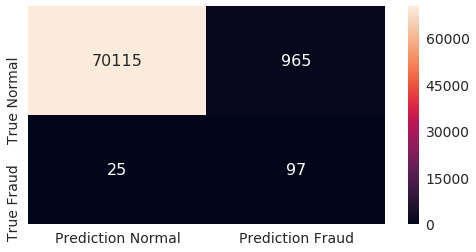

In [53]:
# Calculate performance for model
model_score = calscore(dt_predict,"DecisionTree-RandomOverSampling",model_score)

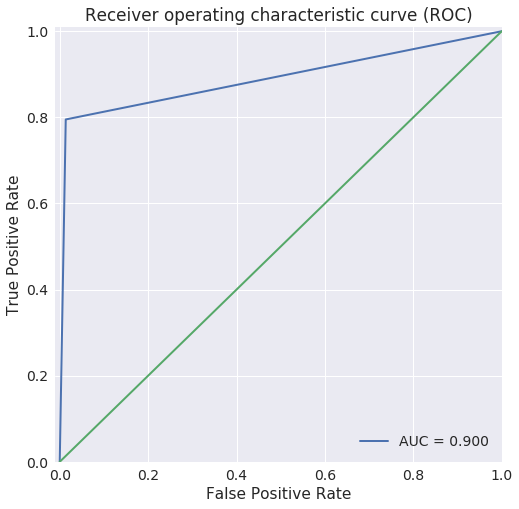

In [54]:
# Plot the roc curve 
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, dt_predict)
roc_auc = roc_auc_score(y_test, y_pred_prob[:,1])
plot_roc_curve(false_positive_rate,true_positive_rate,roc_auc)

### Print the class distribution after applying SMOTE 

#### Treat class imbalance using Random Oversampling

In [55]:
# Treat Imbalance
smote = SMOTE(random_state=40)
X_train_smote, y_tran_smote = smote.fit_sample(X_train,y_train)

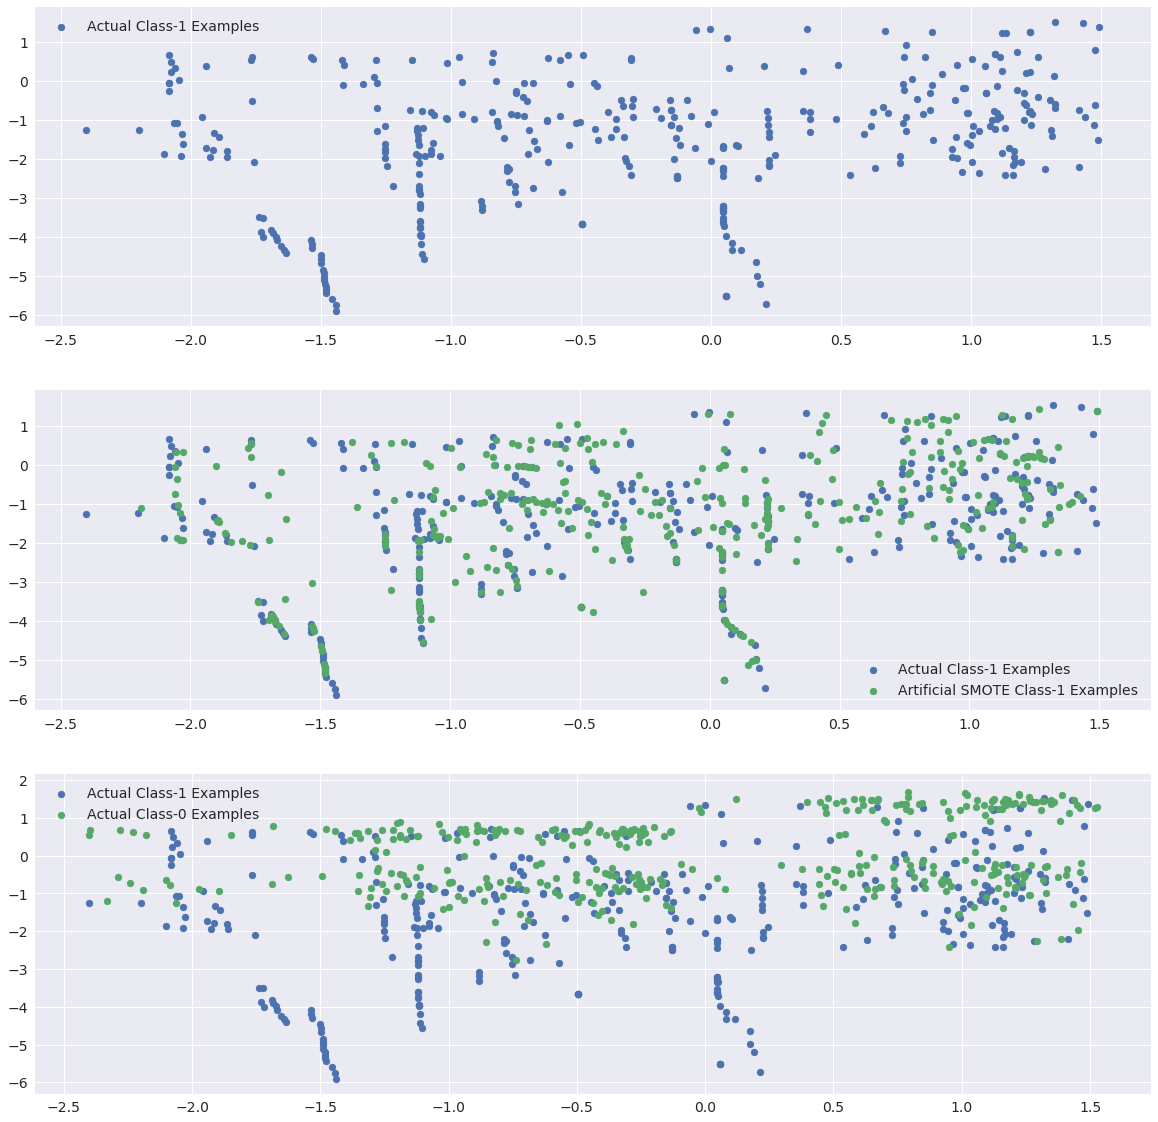

In [56]:
import warnings
warnings.filterwarnings("ignore")


# sm = over_sampling.SMOTE(random_state=0)
# X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from SMOTE are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from SMOTE, we do
X_train_smote_1 = X_train_smote[X_train.shape[0]:]

# X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
# X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

X_train_1 = X_train[np.where(y_train==1.0)]
X_train_0 = X_train[np.where(y_train==0.0)]


plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_smote_1[:X_train_1.shape[0], 0], X_train_smote_1[:X_train_1.shape[0], 1],
            label='Artificial SMOTE Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

### Logistic Regression on Balanced Data (SMOTE)

In [57]:
from imblearn import over_sampling #- import the packages

#perform cross validation & then balance classes on X_train_cv & y_train_cv using Random Oversampling
#perform hyperparameter tuning
# Logistic Regression 
log_reg_params = {"penalty": ['l2'], 'C': [0.001, 0.1, 1, 10, 100]}
skf = StratifiedKFold(n_splits=3, random_state=40, shuffle=False)
grid_log_reg = RandomizedSearchCV(LogisticRegression(), log_reg_params,scoring='roc_auc',verbose=2,cv=skf)
grid_log_reg.fit(X_train_smote, y_tran_smote)

#print the evaluation result by choosing a evaluation metric
print(grid_log_reg.cv_results_)

#print the optimum value of hyperparameters
print("*"*100)
print("Logreg")
print("Best score: ",grid_log_reg.best_score_)
print("Parameters: ",grid_log_reg.best_params_)
print("*"*100)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] penalty=l2, C=0.001 .............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .............................. penalty=l2, C=0.001, total=   1.4s
[CV] penalty=l2, C=0.001 .............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.4s remaining:    0.0s


[CV] .............................. penalty=l2, C=0.001, total=   1.3s
[CV] penalty=l2, C=0.001 .............................................
[CV] .............................. penalty=l2, C=0.001, total=   1.3s
[CV] penalty=l2, C=0.1 ...............................................
[CV] ................................ penalty=l2, C=0.1, total=   2.0s
[CV] penalty=l2, C=0.1 ...............................................
[CV] ................................ penalty=l2, C=0.1, total=   1.9s
[CV] penalty=l2, C=0.1 ...............................................
[CV] ................................ penalty=l2, C=0.1, total=   2.0s
[CV] penalty=l2, C=1 .................................................
[CV] .................................. penalty=l2, C=1, total=   2.0s
[CV] penalty=l2, C=1 .................................................
[CV] .................................. penalty=l2, C=1, total=   2.0s
[CV] penalty=l2, C=1 .................................................
[CV] .

[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:   27.8s finished


{'mean_fit_time': array([1.23276345, 1.89303406, 1.94350545, 1.94474165, 1.93462141]), 'std_fit_time': array([0.04583624, 0.04896176, 0.02351122, 0.02679027, 0.03040602]), 'mean_score_time': array([0.05976073, 0.05962753, 0.06000153, 0.05957802, 0.06015388]), 'std_score_time': array([0.00027023, 0.00046599, 0.0004058 , 0.00043046, 0.00052487]), 'param_penalty': masked_array(data=['l2', 'l2', 'l2', 'l2', 'l2'],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_C': masked_array(data=[0.001, 0.1, 1, 10, 100],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'penalty': 'l2', 'C': 0.001}, {'penalty': 'l2', 'C': 0.1}, {'penalty': 'l2', 'C': 1}, {'penalty': 'l2', 'C': 10}, {'penalty': 'l2', 'C': 100}], 'split0_test_score': array([0.99102263, 0.99120773, 0.99120211, 0.99120158, 0.99120152]), 'split1_test_score': array([0.99092003, 0.99114817, 0.99114507, 0.99114467,

### Logistic Regression with SMOTE Parameters:  {'penalty': 'l2', 'C': 0.1}

In [58]:
clf = LogisticRegression(C= 0.1, penalty = 'l2',random_state=40)  #initialise the model with optimum hyperparameters
clf.fit(X_train_smote, y_tran_smote)

#print the evaluation score on the X_test by choosing the best evaluation metric
# Predict using model
y_pred_prob = clf.predict_proba(X_test)
lr_predict = clf.predict(X_test)

# Check ROC score
print("{:2.2}".format(metrics.roc_auc_score(y_test, y_pred_prob[:,1])))

0.97


In [59]:
model_score

,Model,Accuracy,Recall,Precision,AUC
0,Logreg-Unbalanced,0.9991,0.6393,0.7959,0.8195
0,DecisionTree-Unbalanced,0.9991,0.7131,0.7436,0.8563
0,XGB-Unbalanced,0.9994,0.7295,0.8990,0.8647
0,Logreg-RandomOverSampling,0.9757,0.8852,0.0592,0.9306
0,XGB-RandomOverSampling,0.9993,0.7869,0.8136,0.8933
0,DecisionTree-RandomOverSampling,0.9861,0.7951,0.0913,0.8908


Accuracy: 97.4186%
Recall: 89.3443%
Precision: 5.6360%
ROC AUC: 93.3884%


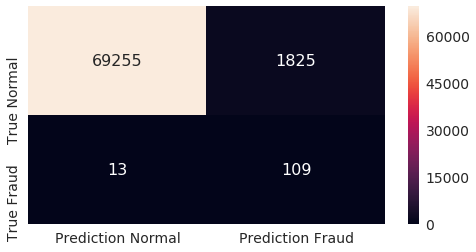

In [60]:
# Calculate performance for model
model_score = calscore(lr_predict,"LogReg-SMOTE",model_score)

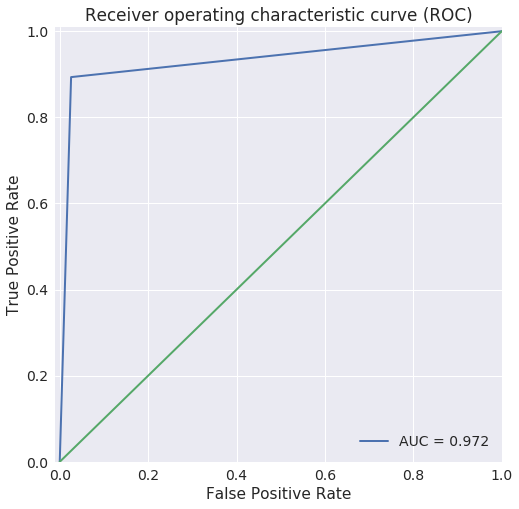

In [61]:
# Plot the roc curve 
plt.rcParams['figure.figsize'] = [8, 8]
fig = plt.figure()
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, lr_predict)
roc_auc = roc_auc_score(y_test, y_pred_prob[:,1])
plot_roc_curve(false_positive_rate,true_positive_rate,roc_auc)

### XGB Regression on Balanced Data (SMOTE)

In [62]:
from imblearn import over_sampling #- import the packages

#perform cross validation & then balance classes on X_train_cv & y_train_cv using Random Oversampling
#perform hyperparameter tuning
xgb_params = {'learning_rate': [0.6, 0.8], 'subsample': [0.6, 0.9]}
skf = StratifiedKFold(n_splits=3, random_state=40, shuffle=False)
xgb = RandomizedSearchCV(XGBClassifier(max_depth=2, n_estimators=200), xgb_params,scoring='roc_auc',verbose=2,cv=skf)
xgb.fit(X_train_smote, y_tran_smote)

#print the evaluation result by choosing a evaluation metric
print(xgb.cv_results_)

#print the optimum value of hyperparameters
print("*"*100)
print("XGB")
print("Best score: ",xgb.best_score_)
print("Parameters: ",xgb.best_params_)
print("*"*100)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV] subsample=0.6, learning_rate=0.6 ................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................. subsample=0.6, learning_rate=0.6, total=  40.6s
[CV] subsample=0.6, learning_rate=0.6 ................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   40.6s remaining:    0.0s


[CV] ................. subsample=0.6, learning_rate=0.6, total=  40.6s
[CV] subsample=0.6, learning_rate=0.6 ................................
[CV] ................. subsample=0.6, learning_rate=0.6, total=  40.6s
[CV] subsample=0.9, learning_rate=0.6 ................................
[CV] ................. subsample=0.9, learning_rate=0.6, total=  46.1s
[CV] subsample=0.9, learning_rate=0.6 ................................
[CV] ................. subsample=0.9, learning_rate=0.6, total=  46.1s
[CV] subsample=0.9, learning_rate=0.6 ................................
[CV] ................. subsample=0.9, learning_rate=0.6, total=  46.3s
[CV] subsample=0.6, learning_rate=0.8 ................................
[CV] ................. subsample=0.6, learning_rate=0.8, total=  40.5s
[CV] subsample=0.6, learning_rate=0.8 ................................
[CV] ................. subsample=0.6, learning_rate=0.8, total=  40.6s
[CV] subsample=0.6, learning_rate=0.8 ................................
[CV] .

[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:  8.7min finished


{'mean_fit_time': array([40.18906546, 45.78046894, 40.13292321, 45.64292812]), 'std_fit_time': array([0.02073778, 0.08879518, 0.03586834, 0.0554962 ]), 'mean_score_time': array([0.40128708, 0.40332548, 0.39369782, 0.3934559 ]), 'std_score_time': array([0.00205404, 0.00567451, 0.00100532, 0.00255465]), 'param_subsample': masked_array(data=[0.6, 0.9, 0.6, 0.9],
             mask=[False, False, False, False],
       fill_value='?',
            dtype=object), 'param_learning_rate': masked_array(data=[0.6, 0.6, 0.8, 0.8],
             mask=[False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'subsample': 0.6, 'learning_rate': 0.6}, {'subsample': 0.9, 'learning_rate': 0.6}, {'subsample': 0.6, 'learning_rate': 0.8}, {'subsample': 0.9, 'learning_rate': 0.8}], 'split0_test_score': array([0.99995078, 0.99995694, 0.99997692, 0.99996825]), 'split1_test_score': array([0.99996651, 0.99997368, 0.99997319, 0.99997423]), 'split2_test_score': array([0.99996103, 0.9

### XGBoost with SMOTE Parameters:  {'learning_rate': 0.8, 'subsample': 0.6}

In [63]:
clf = XGBClassifier(learning_rate=0.8, subsample=0.6, max_depth=2, n_estimators=200)  #initialise the model with optimum hyperparameters
clf.fit(X_train_smote, y_tran_smote)

#print the evaluation score on the X_test by choosing the best evaluation metric
# Predict using model
y_pred_prob = clf.predict_proba(X_test)
xgb_predict = clf.predict(X_test)

# Check ROC score
print("{:2.2}".format(metrics.roc_auc_score(y_test, y_pred_prob[:,1])))

0.95


Accuracy: 99.8244%
Recall: 81.9672%
Precision: 49.2611%
ROC AUC: 90.9112%


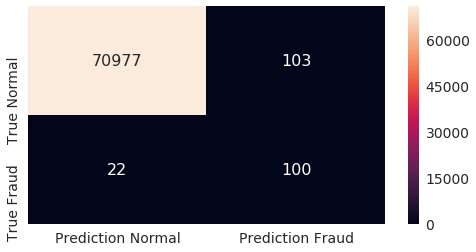

In [64]:
# Calculate performance for model
model_score = calscore(xgb_predict,"XGB-SMOTE",model_score)

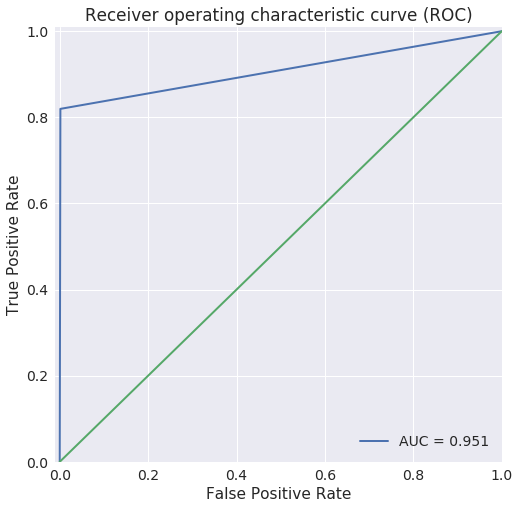

In [65]:
# Plot the roc curve 
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, xgb_predict)
roc_auc = roc_auc_score(y_test, y_pred_prob[:,1])
plot_roc_curve(false_positive_rate,true_positive_rate,roc_auc)

### Decision Tree on Balanced Data (SMOTE)

In [66]:
from imblearn import over_sampling #- import the packages

#perform cross validation & then balance classes on X_train_cv & y_train_cv using Random Oversampling
#perform hyperparameter tuning
# DecisionTree Classifier
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,6,2)), 
              "min_samples_leaf": list(range(5,10,2))}
skf = StratifiedKFold(n_splits=3, random_state=40, shuffle=False)
grid_tree = RandomizedSearchCV(DecisionTreeClassifier(), tree_params,scoring='roc_auc',verbose=2,cv=skf)
grid_tree.fit(X_train_smote, y_tran_smote)

#print the evaluation result by choosing a evaluation metric
print(grid_tree.cv_results_)

#print the optimum value of hyperparameters
print("*"*100)
print("Decision Tree")
print("Best score: ",grid_tree.best_score_)
print("Parameters: ",grid_tree.best_params_)
print("*"*100)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] min_samples_leaf=5, max_depth=2, criterion=gini .................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .. min_samples_leaf=5, max_depth=2, criterion=gini, total=   2.9s
[CV] min_samples_leaf=5, max_depth=2, criterion=gini .................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.9s remaining:    0.0s


[CV] .. min_samples_leaf=5, max_depth=2, criterion=gini, total=   2.9s
[CV] min_samples_leaf=5, max_depth=2, criterion=gini .................
[CV] .. min_samples_leaf=5, max_depth=2, criterion=gini, total=   3.0s
[CV] min_samples_leaf=7, max_depth=2, criterion=entropy ..............
[CV]  min_samples_leaf=7, max_depth=2, criterion=entropy, total=   4.6s
[CV] min_samples_leaf=7, max_depth=2, criterion=entropy ..............
[CV]  min_samples_leaf=7, max_depth=2, criterion=entropy, total=   4.6s
[CV] min_samples_leaf=7, max_depth=2, criterion=entropy ..............
[CV]  min_samples_leaf=7, max_depth=2, criterion=entropy, total=   4.6s
[CV] min_samples_leaf=9, max_depth=2, criterion=entropy ..............
[CV]  min_samples_leaf=9, max_depth=2, criterion=entropy, total=   4.6s
[CV] min_samples_leaf=9, max_depth=2, criterion=entropy ..............
[CV]  min_samples_leaf=9, max_depth=2, criterion=entropy, total=   4.7s
[CV] min_samples_leaf=9, max_depth=2, criterion=entropy ..............
[

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:  2.7min finished


{'mean_fit_time': array([2.91668423, 4.54617286, 4.57600419, 8.42573953, 5.68803517,
       2.99960629, 8.47878551, 5.71983004, 4.58989946, 5.68827041]), 'std_fit_time': array([0.01675653, 0.0148132 , 0.03759684, 0.10158942, 0.01512689,
       0.03838239, 0.04877118, 0.01490597, 0.00485982, 0.0165722 ]), 'mean_score_time': array([0.0387578 , 0.03985961, 0.04049889, 0.04260437, 0.04115009,
       0.03870535, 0.04272731, 0.04086415, 0.04041346, 0.04225707]), 'std_score_time': array([0.00082749, 0.00083558, 0.00065216, 0.00160962, 0.00022978,
       0.0012892 , 0.0009114 , 0.00053729, 0.00079289, 0.00037108]), 'param_min_samples_leaf': masked_array(data=[5, 7, 9, 9, 7, 9, 5, 9, 5, 5],
             mask=[False, False, False, False, False, False, False, False,
                   False, False],
       fill_value='?',
            dtype=object), 'param_max_depth': masked_array(data=[2, 2, 2, 4, 4, 2, 4, 4, 2, 4],
             mask=[False, False, False, False, False, False, False, False,
      

### Decision Tree with Random Oversampling Parameters:  {'min_samples_leaf': 7, 'max_depth': 4, 'criterion': 'entropy'}

In [67]:
clf = DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=7)  #initialise the model with optimum hyperparameters
clf.fit(X_train_smote, y_tran_smote)

#print the evaluation score on the X_test by choosing the best evaluation metric
# Predict using model
y_pred_prob = clf.predict_proba(X_test)
dt_predict = clf.predict(X_test)

# Check ROC score
print("{:2.2}".format(metrics.roc_auc_score(y_test, y_pred_prob[:,1])))

0.95


Accuracy: 97.5029%
Recall: 85.2459%
Precision: 5.5794%
ROC AUC: 91.3849%


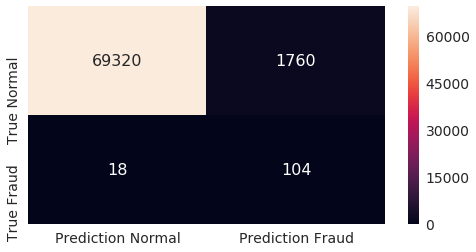

In [68]:
# Calculate performance for model
model_score = calscore(dt_predict,"DecisionTree-SMOTE",model_score)

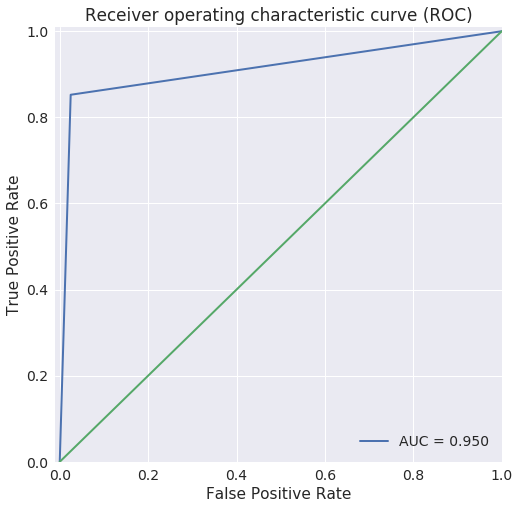

In [69]:
# Plot the roc curve 
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, dt_predict)
roc_auc = roc_auc_score(y_test, y_pred_prob[:,1])
plot_roc_curve(false_positive_rate,true_positive_rate,roc_auc)

In [70]:
model_score

,Model,Accuracy,Recall,Precision,AUC
0,Logreg-Unbalanced,0.9991,0.6393,0.7959,0.8195
0,DecisionTree-Unbalanced,0.9991,0.7131,0.7436,0.8563
0,XGB-Unbalanced,0.9994,0.7295,0.8990,0.8647
0,Logreg-RandomOverSampling,0.9757,0.8852,0.0592,0.9306
0,XGB-RandomOverSampling,0.9993,0.7869,0.8136,0.8933
0,DecisionTree-RandomOverSampling,0.9861,0.7951,0.0913,0.8908
0,LogReg-SMOTE,0.9742,0.8934,0.0564,0.9339
0,XGB-SMOTE,0.9982,0.8197,0.4926,0.9091
0,DecisionTree-SMOTE,0.9750,0.8525,0.0558,0.9138


### Print the class distribution after applying ADASYN

#### Treat class imbalance using ADASYN

In [71]:
# Treat Imbalance
adasyn = ADASYN(random_state=40)
X_train_adasyn, y_tran_adasyn = adasyn.fit_sample(X_train,y_train)

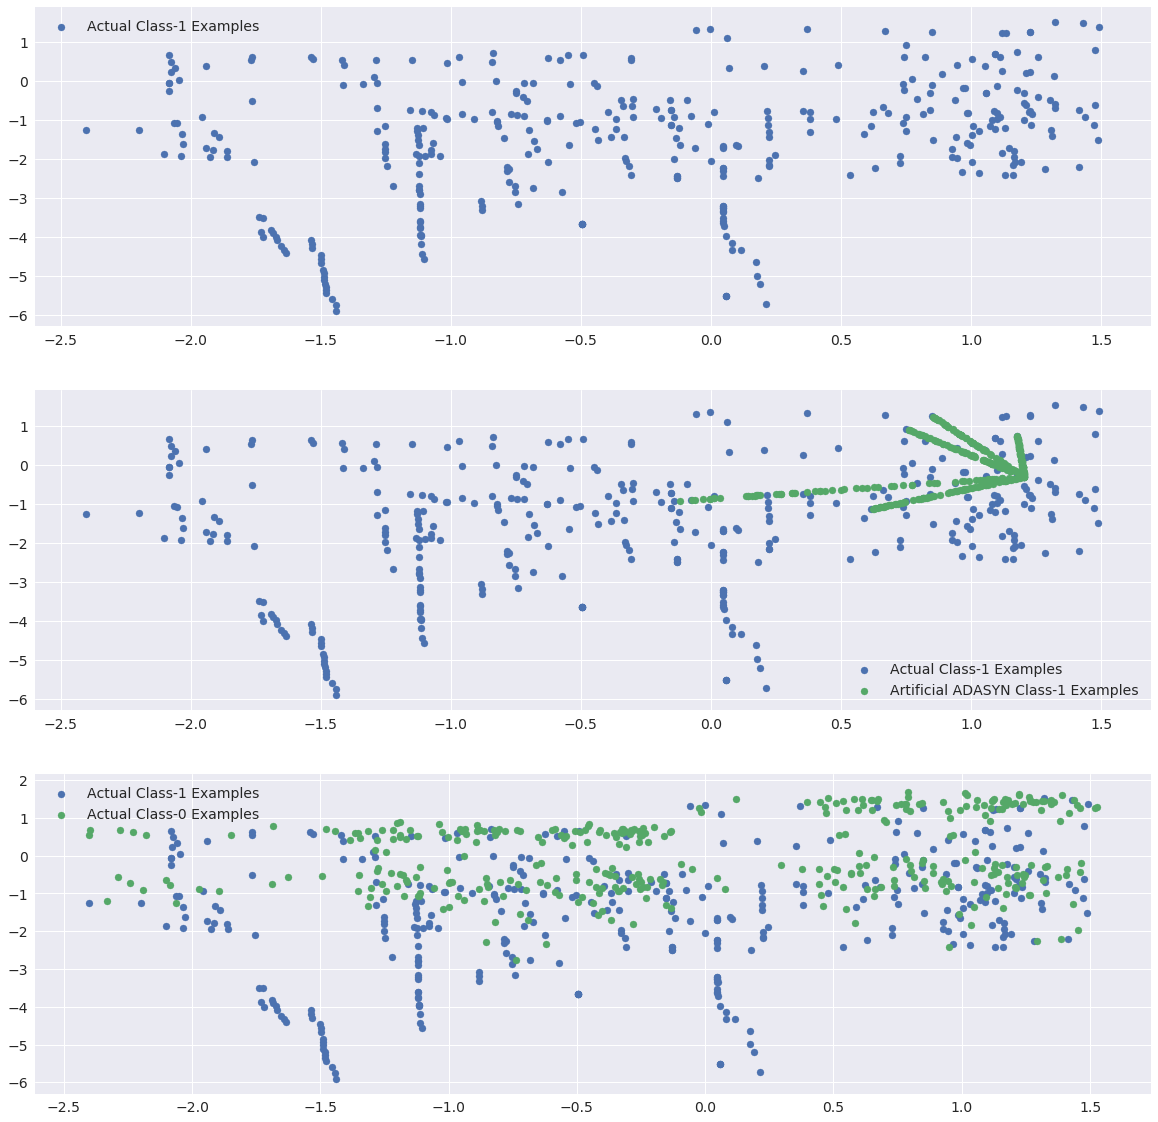

In [72]:
import warnings
warnings.filterwarnings("ignore")

from imblearn import over_sampling

ada = over_sampling.ADASYN(random_state=0)
X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from ADASYN are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from ADASYN, we do
X_train_adasyn_1 = X_train_adasyn[X_train.shape[0]:]

# X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
# X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

X_train_1 = X_train[np.where(y_train==1.0)]
X_train_0 = X_train[np.where(y_train==0.0)]


import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_adasyn_1[:X_train_1.shape[0], 0], X_train_adasyn_1[:X_train_1.shape[0], 1],
            label='Artificial ADASYN Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

### Logistic Regression on Balanced Data (ADASYN)

In [73]:
from imblearn import over_sampling #- import the packages

#perform cross validation & then balance classes on X_train_cv & y_train_cv using Random Oversampling
#perform hyperparameter tuning
# Logistic Regression 
log_reg_params = {"penalty": ['l2'], 'C': [0.001, 0.1, 1, 10, 100]}
skf = StratifiedKFold(n_splits=3, random_state=40, shuffle=False)
grid_log_reg = RandomizedSearchCV(LogisticRegression(), log_reg_params,scoring='roc_auc',verbose=2,cv=skf)
grid_log_reg.fit(X_train_adasyn, y_tran_adasyn)

#print the evaluation result by choosing a evaluation metric
print(grid_log_reg.cv_results_)

#print the optimum value of hyperparameters
print("*"*100)
print("Logreg")
print("Best score: ",grid_log_reg.best_score_)
print("Parameters: ",grid_log_reg.best_params_)
print("*"*100)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] penalty=l2, C=0.001 .............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .............................. penalty=l2, C=0.001, total=   1.5s
[CV] penalty=l2, C=0.001 .............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.5s remaining:    0.0s


[CV] .............................. penalty=l2, C=0.001, total=   1.6s
[CV] penalty=l2, C=0.001 .............................................
[CV] .............................. penalty=l2, C=0.001, total=   1.6s
[CV] penalty=l2, C=0.1 ...............................................
[CV] ................................ penalty=l2, C=0.1, total=   1.6s
[CV] penalty=l2, C=0.1 ...............................................
[CV] ................................ penalty=l2, C=0.1, total=   1.9s
[CV] penalty=l2, C=0.1 ...............................................
[CV] ................................ penalty=l2, C=0.1, total=   1.8s
[CV] penalty=l2, C=1 .................................................
[CV] .................................. penalty=l2, C=1, total=   1.7s
[CV] penalty=l2, C=1 .................................................
[CV] .................................. penalty=l2, C=1, total=   1.9s
[CV] penalty=l2, C=1 .................................................
[CV] .

[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:   26.1s finished


{'mean_fit_time': array([1.48851879, 1.70356194, 1.72004326, 1.73141098, 1.72151232]), 'std_fit_time': array([0.06369267, 0.10377885, 0.07879027, 0.07904441, 0.08450721]), 'mean_score_time': array([0.05876478, 0.05847081, 0.05816698, 0.05923525, 0.0594182 ]), 'std_score_time': array([0.00035291, 0.00049343, 0.00052582, 0.00046676, 0.00099946]), 'param_penalty': masked_array(data=['l2', 'l2', 'l2', 'l2', 'l2'],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_C': masked_array(data=[0.001, 0.1, 1, 10, 100],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'penalty': 'l2', 'C': 0.001}, {'penalty': 'l2', 'C': 0.1}, {'penalty': 'l2', 'C': 1}, {'penalty': 'l2', 'C': 10}, {'penalty': 'l2', 'C': 100}], 'split0_test_score': array([0.93736278, 0.94590789, 0.94604349, 0.94605767, 0.94605904]), 'split1_test_score': array([0.93703428, 0.93743776, 0.93738668, 0.93738138,

### Logistic Regression with ADASYN Parameters:  {'penalty': 'l2', 'C': 100}

In [74]:
clf = LogisticRegression(C= 100, penalty = 'l2',random_state=40)  #initialise the model with optimum hyperparameters
clf.fit(X_train_adasyn, y_tran_adasyn)

#print the evaluation score on the X_test by choosing the best evaluation metric
# Predict using model
y_pred_prob = clf.predict_proba(X_test)
lr_predict = clf.predict(X_test)

# Check ROC score
print("{:2.2}".format(metrics.roc_auc_score(y_test, y_pred_prob[:,1])))

0.97


Accuracy: 90.7587%
Recall: 95.0820%
Precision: 1.7339%
ROC AUC: 92.9166%


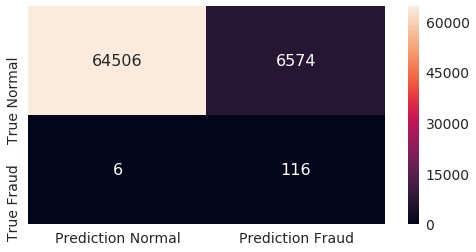

In [75]:
# Calculate performance for model
model_score = calscore(lr_predict,"Logreg-ADASYN",model_score)

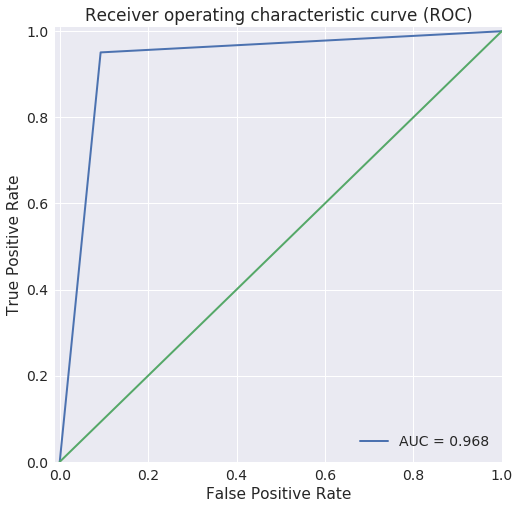

In [76]:
# Plot the roc curve 
plt.rcParams['figure.figsize'] = [8, 8]
fig = plt.figure()
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, lr_predict)
roc_auc = roc_auc_score(y_test, y_pred_prob[:,1])
plot_roc_curve(false_positive_rate,true_positive_rate,roc_auc)

### XGB Regression on Balanced Data (ADASYN)

In [77]:
from imblearn import over_sampling #- import the packages

#perform cross validation & then balance classes on X_train_cv & y_train_cv using Random Oversampling
#perform hyperparameter tuning
xgb_params = {'learning_rate': [0.4, 0.6],'max_depth':[4,6]}
skf = StratifiedKFold(n_splits=3, random_state=40, shuffle=False)
xgb = RandomizedSearchCV(XGBClassifier(n_estimators=200,subsample=0.9), xgb_params,scoring='roc_auc',verbose=2,cv=skf,return_train_score=True,n_jobs=1)
xgb.fit(X_train_adasyn, y_tran_adasyn)

#print the evaluation result by choosing a evaluation metric
print(xgb.cv_results_)

#print the optimum value of hyperparameters
print("*"*100)
print("XGB")
print("Best score: ",xgb.best_score_)
print("Parameters: ",xgb.best_params_)
print("*"*100)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV] max_depth=4, learning_rate=0.4 ..................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................... max_depth=4, learning_rate=0.4, total= 1.4min
[CV] max_depth=4, learning_rate=0.4 ..................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.4min remaining:    0.0s


[CV] ................... max_depth=4, learning_rate=0.4, total= 1.4min
[CV] max_depth=4, learning_rate=0.4 ..................................
[CV] ................... max_depth=4, learning_rate=0.4, total= 1.4min
[CV] max_depth=6, learning_rate=0.4 ..................................
[CV] ................... max_depth=6, learning_rate=0.4, total= 1.7min
[CV] max_depth=6, learning_rate=0.4 ..................................
[CV] ................... max_depth=6, learning_rate=0.4, total= 1.7min
[CV] max_depth=6, learning_rate=0.4 ..................................
[CV] ................... max_depth=6, learning_rate=0.4, total= 1.7min
[CV] max_depth=4, learning_rate=0.6 ..................................
[CV] ................... max_depth=4, learning_rate=0.6, total= 1.3min
[CV] max_depth=4, learning_rate=0.6 ..................................
[CV] ................... max_depth=4, learning_rate=0.6, total= 1.3min
[CV] max_depth=4, learning_rate=0.6 ..................................
[CV] .

[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed: 18.0min finished


{'mean_fit_time': array([ 84.05299107, 102.41632756,  77.87019531,  88.80993406]), 'std_fit_time': array([0.47324471, 1.08956244, 1.28411649, 1.00052409]), 'mean_score_time': array([0.57538795, 0.68711829, 0.5702378 , 0.63035266]), 'std_score_time': array([0.00454014, 0.00588493, 0.00685048, 0.00311322]), 'param_max_depth': masked_array(data=[4, 6, 4, 6],
             mask=[False, False, False, False],
       fill_value='?',
            dtype=object), 'param_learning_rate': masked_array(data=[0.4, 0.4, 0.6, 0.6],
             mask=[False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'max_depth': 4, 'learning_rate': 0.4}, {'max_depth': 6, 'learning_rate': 0.4}, {'max_depth': 4, 'learning_rate': 0.6}, {'max_depth': 6, 'learning_rate': 0.6}], 'split0_test_score': array([0.98975067, 0.98927239, 0.98881719, 0.98752284]), 'split1_test_score': array([0.99976668, 0.99970489, 0.99961077, 0.99943249]), 'split2_test_score': array([0.99982591, 0.99982734, 0.9

### XGBoost with ADASYN Parameters:  {'max_depth': 4, 'learning_rate': 0.4}

In [78]:
clf = XGBClassifier(learning_rate=0.4, subsample=0.9, max_depth=4, n_estimators=400)  #initialise the model with optimum hyperparameters
clf.fit(X_train_adasyn, y_tran_adasyn)

#print the evaluation score on the X_test by choosing the best evaluation metric
# Predict using model
y_pred_prob = clf.predict_proba(X_test)
xgb_predict = clf.predict(X_test)

# Check ROC score
print("{:2.2}".format(metrics.roc_auc_score(y_test, y_pred_prob[:,1])))

0.96


Accuracy: 99.9101%
Recall: 80.3279%
Precision: 71.0145%
ROC AUC: 90.1358%


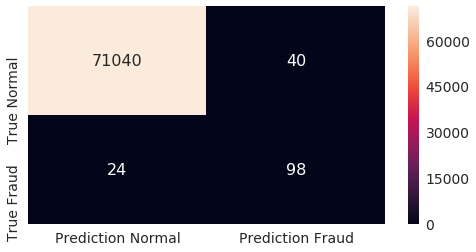

In [79]:
# Calculate performance for model
model_score = calscore(xgb_predict,"XGB-ADASYN",model_score)

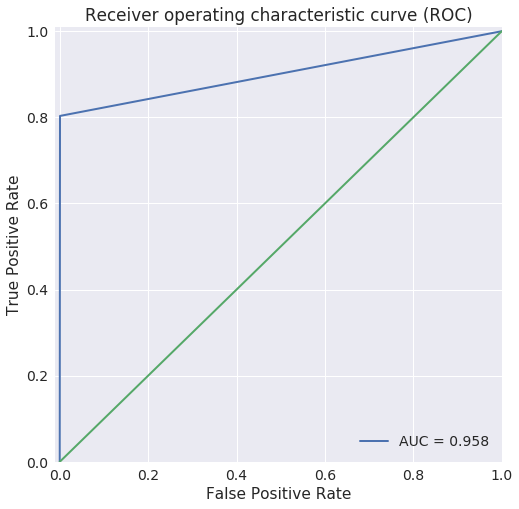

In [80]:
# Plot the roc curve 
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, xgb_predict)
roc_auc = roc_auc_score(y_test, y_pred_prob[:,1])
plot_roc_curve(false_positive_rate,true_positive_rate,roc_auc)

### Decision Tree on Balanced Data (ADASYN)

In [81]:
from imblearn import over_sampling #- import the packages

#perform cross validation & then balance classes on X_train_cv & y_train_cv using Random Oversampling
#perform hyperparameter tuning
# DecisionTree Classifier
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,6,2)), 
              "min_samples_leaf": list(range(5,10,2))}
skf = StratifiedKFold(n_splits=3, random_state=40, shuffle=False)
grid_tree = RandomizedSearchCV(DecisionTreeClassifier(), tree_params,scoring='roc_auc',verbose=2,cv=skf)
grid_tree.fit(X_train_adasyn, y_tran_adasyn)

#print the evaluation result by choosing a evaluation metric
print(grid_tree.cv_results_)

#print the optimum value of hyperparameters
print("*"*100)
print("Decision Tree")
print("Best score: ",grid_tree.best_score_)
print("Parameters: ",grid_tree.best_params_)
print("*"*100)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] min_samples_leaf=9, max_depth=4, criterion=entropy ..............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  min_samples_leaf=9, max_depth=4, criterion=entropy, total=   8.3s
[CV] min_samples_leaf=9, max_depth=4, criterion=entropy ..............


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.3s remaining:    0.0s


[CV]  min_samples_leaf=9, max_depth=4, criterion=entropy, total=   8.4s
[CV] min_samples_leaf=9, max_depth=4, criterion=entropy ..............
[CV]  min_samples_leaf=9, max_depth=4, criterion=entropy, total=   8.7s
[CV] min_samples_leaf=9, max_depth=2, criterion=gini .................
[CV] .. min_samples_leaf=9, max_depth=2, criterion=gini, total=   2.9s
[CV] min_samples_leaf=9, max_depth=2, criterion=gini .................
[CV] .. min_samples_leaf=9, max_depth=2, criterion=gini, total=   3.0s
[CV] min_samples_leaf=9, max_depth=2, criterion=gini .................
[CV] .. min_samples_leaf=9, max_depth=2, criterion=gini, total=   3.0s
[CV] min_samples_leaf=7, max_depth=4, criterion=entropy ..............
[CV]  min_samples_leaf=7, max_depth=4, criterion=entropy, total=   8.4s
[CV] min_samples_leaf=7, max_depth=4, criterion=entropy ..............
[CV]  min_samples_leaf=7, max_depth=4, criterion=entropy, total=   8.6s
[CV] min_samples_leaf=7, max_depth=4, criterion=entropy ..............
[C

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:  2.8min finished


{'mean_fit_time': array([8.40656074, 2.91515557, 8.56458036, 4.67399883, 8.5533127 ,
       2.98361715, 5.58331609, 2.99362246, 5.6220065 , 5.61946599]), 'std_fit_time': array([0.1564054 , 0.0303822 , 0.18721109, 0.00773941, 0.16062244,
       0.01319553, 0.03187315, 0.00797485, 0.03592523, 0.01849826]), 'mean_score_time': array([0.04160229, 0.03961031, 0.04204655, 0.03983688, 0.04195786,
       0.0384171 , 0.04107618, 0.03867976, 0.04170116, 0.04163361]), 'std_score_time': array([0.00074968, 0.00041398, 0.00045983, 0.00053179, 0.00105443,
       0.0009172 , 0.0002298 , 0.00035147, 0.00046016, 0.00081779]), 'param_min_samples_leaf': masked_array(data=[9, 9, 7, 7, 5, 7, 9, 5, 5, 7],
             mask=[False, False, False, False, False, False, False, False,
                   False, False],
       fill_value='?',
            dtype=object), 'param_max_depth': masked_array(data=[4, 2, 4, 2, 4, 2, 4, 2, 4, 4],
             mask=[False, False, False, False, False, False, False, False,
      

### Decision Tree with ADASYN Parameters:  {'min_samples_leaf': 9, 'max_depth': 4, 'criterion': 'entropy'}

In [82]:
clf = DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=9
                            )  #initialise the model with optimum hyperparameters
clf.fit(X_train_adasyn, y_tran_adasyn)

#print the evaluation score on the X_test by choosing the best evaluation metric
# Predict using model
y_pred_prob = clf.predict_proba(X_test)
dt_predict = clf.predict(X_test)

# Check ROC score
print("{:2.2}".format(metrics.roc_auc_score(y_test, y_pred_prob[:,1])))

0.95


Accuracy: 84.0791%
Recall: 92.6230%
Precision: 0.9878%
ROC AUC: 88.3437%


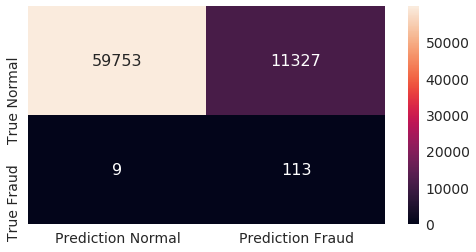

In [83]:
# Calculate performance for model
model_score = calscore(dt_predict,"DecisionTree-ADASYN",model_score)

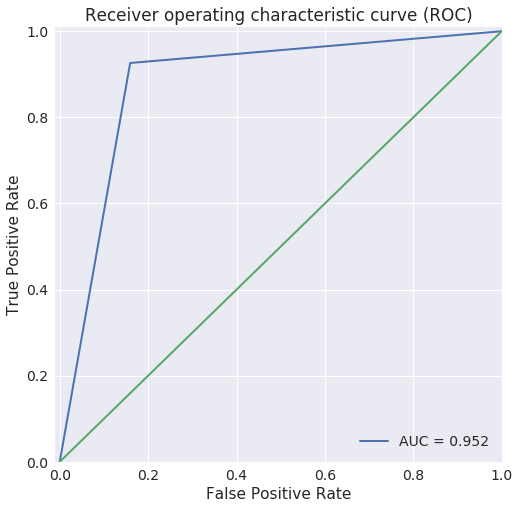

In [84]:
# Plot the roc curve 
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, dt_predict)
roc_auc = roc_auc_score(y_test, y_pred_prob[:,1])
plot_roc_curve(false_positive_rate,true_positive_rate,roc_auc)

In [85]:
# Check score
model_score

,Model,Accuracy,Recall,Precision,AUC
0,Logreg-Unbalanced,0.9991,0.6393,0.7959,0.8195
0,DecisionTree-Unbalanced,0.9991,0.7131,0.7436,0.8563
0,XGB-Unbalanced,0.9994,0.7295,0.8990,0.8647
0,Logreg-RandomOverSampling,0.9757,0.8852,0.0592,0.9306
0,XGB-RandomOverSampling,0.9993,0.7869,0.8136,0.8933
0,DecisionTree-RandomOverSampling,0.9861,0.7951,0.0913,0.8908
0,LogReg-SMOTE,0.9742,0.8934,0.0564,0.9339
0,XGB-SMOTE,0.9982,0.8197,0.4926,0.9091
0,DecisionTree-SMOTE,0.9750,0.8525,0.0558,0.9138
0,Logreg-ADASYN,0.9076,0.9508,0.0173,0.9292


<Figure size 1440x1440 with 0 Axes>

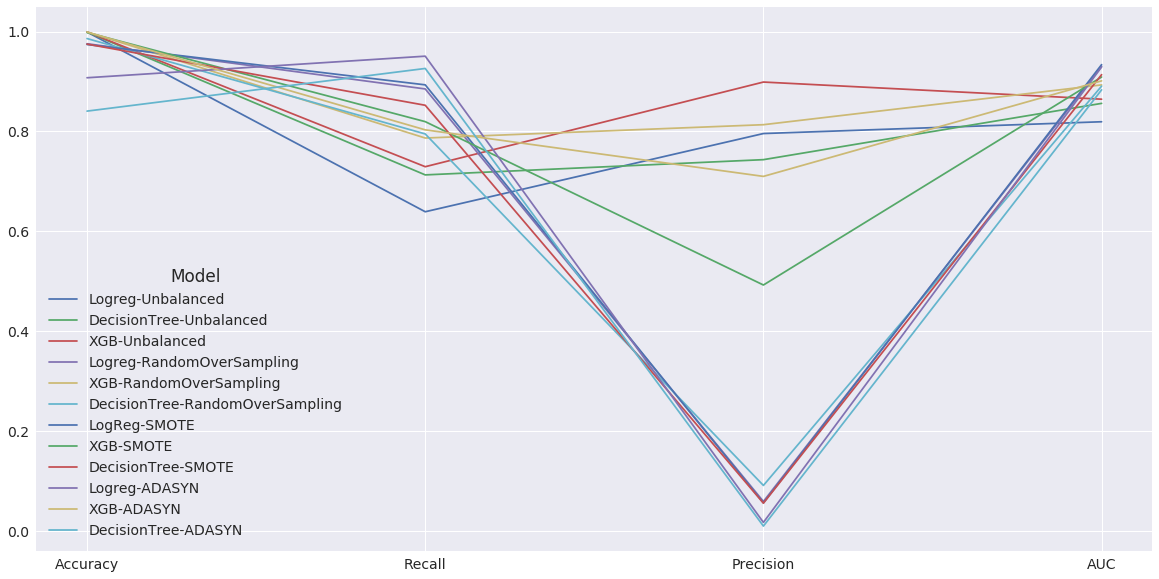

In [86]:
# Plot model_score

df_score = model_score.set_index("Model").T
# # Plot for scores
plt.figure(2,figsize=(20,20))
df_score.plot(figsize=(20,10))
plt.xticks(range(len(df_score.index)), df_score.index)
plt.show()

## Conclusion <br>
**XGB with Random OverSampling gives the best result**  <br>
**Accuracy: 99.9326%**  <br>
**Recall: 78.6885%**  <br>
**Precision: 81.3559%**  <br>
**ROC AUC: 89.3288%**  <br>

In [87]:
# # perform the best oversampling method on X_train & y_train

# clf = ___  #initialise the model with optimum hyperparameters
# clf.fit( ) # fit on the balanced dataset
# print() --> #print the evaluation score on the X_test by choosing the best evaluation metric

clf = XGBClassifier(learning_rate=0.8, subsample=0.9, max_depth=2, n_estimators=200)  #initialise the model with optimum hyperparameters
clf.fit(X_oversam, y_oversam)

#print the evaluation score on the X_test by choosing the best evaluation metric
# Predict using model
y_pred_prob = clf.predict_proba(X_test)
xgb_predict = clf.predict(X_test)

# Check ROC score
print("{:2.2}".format(metrics.roc_auc_score(y_test, y_pred_prob[:,1])))

0.97


### Print the important features of the best model to understand the dataset

Top var = 15
2nd Top var = 11
3rd Top var = 5


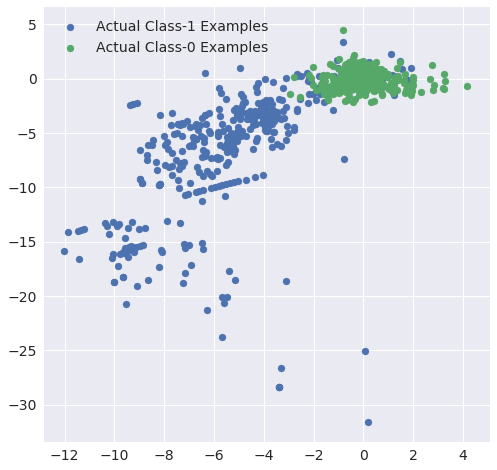

In [88]:
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-13 and Index-9 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

# X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
# X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

X_train_1 = X_train[np.where(y_train==1.0)]
X_train_0 = X_train[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [8, 8]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

#### Print the FPR,TPR & select the best threshold from the roc curve

Train auc = 0.8932878677454172
1


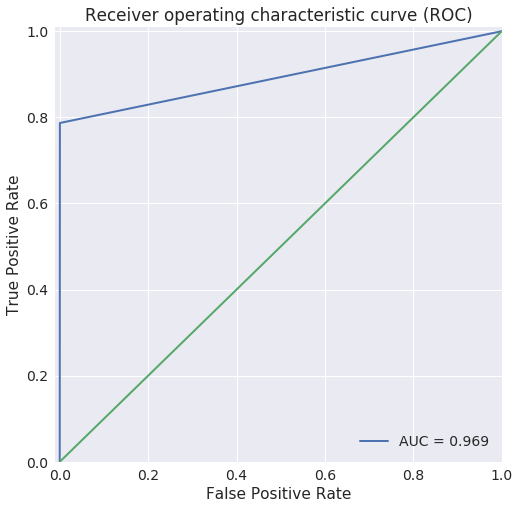

In [89]:
print('Train auc =', metrics.roc_auc_score(y_test, xgb_predict))
fpr, tpr, thresholds = metrics.roc_curve(y_test, xgb_predict)
threshold = thresholds[np.argmax(tpr-fpr)]
print(threshold)

# Plot the roc curve 
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, xgb_predict)
roc_auc = roc_auc_score(y_test, y_pred_prob[:,1])
plot_roc_curve(false_positive_rate,true_positive_rate,roc_auc)

In [90]:
# Checking time
end = time.time()
print("Total Time: {} second".format(end-start))
print("Total TIme: {} minutes".format((end-start)/60))

Total Time: 4124.308882713318 second
Total TIme: 68.73848137855529 minutes
